In [1]:
import matplotlib
import numpy as np
import scipy as sp
import netCDF4 as nc
import cmocean as cm
from scipy.io import loadmat
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import os

%matplotlib inline

from salishsea_tools import viz_tools, places, nc_tools
from salishsea_tools import visualisations as vis

In [2]:
def make_prefix(date, path, res='h'):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1d_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix

In [3]:
#define paths
NEMO = '/results2/SalishSea/nowcast-green.201905/'
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
thalweg_in = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask=xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

### Summer - typical estuarine flow

In [4]:
hour_of_day_to_plot = 8
x_size_of_plot = 11
y_size_of_plot = 10
stepsize = 0.2
do_I_want_to_save_fig = False
titlefontsize = 20
cbarfontsize = 18
cbartickfontsize = 18
axistickfontsize = 18
#colourmap I've chosen, from https://matplotlib.org/cmocean/
t_cmap = cm.cm.dense

In [31]:
np.shape(nc_to_plot[variable_to_plot][hour_of_day_to_plot-1,:,:,:])

(40, 898, 398)

In [29]:
nc_to_plot = xr.open_dataset(make_prefix(day,NEMO)+'_grid_T.nc')
nc_to_plot.vosaline[hour_of_day_to_plot-1,:,:,:]
#nc_to_plot.vosaline.resample(time_counter='D').mean(dim='time_counter')

(40, 898, 398)

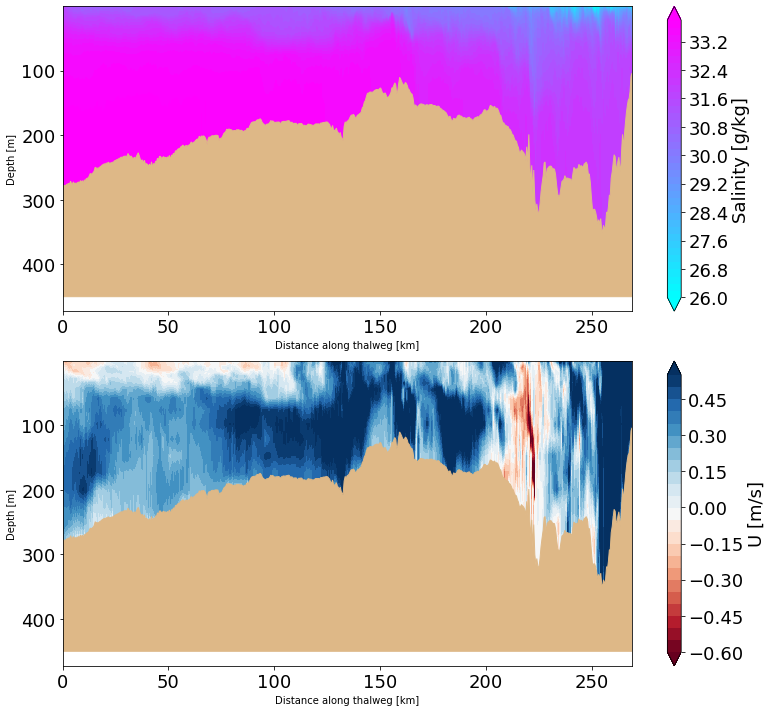

In [34]:
#SUMMER
tit = 'Typical Estuarine Flow'

day = datetime(2020, 6, 1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO)+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][hour_of_day_to_plot-1,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 34, stepsize), cmap = 'cool', thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
#ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO)+'_grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][hour_of_day_to_plot-1,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.6, 0.6, 0.05), cmap = 'RdBu', thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

In [36]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r')

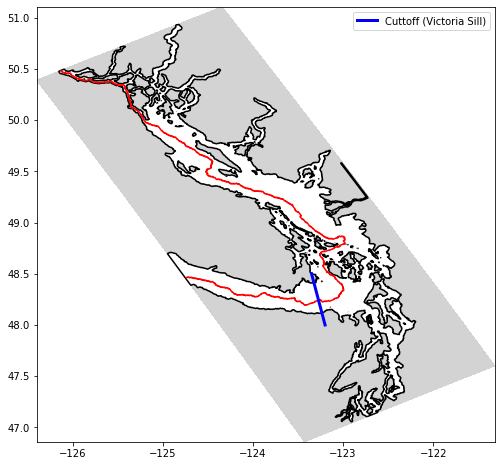

In [53]:
# Plot Basemap
x, y = coords.nav_lon.values, coords.nav_lat.values

fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#ax.set_xlim([-124.8, -122.7])
#ax.set_ylim([48, 49.2])
ax.set_aspect(5/4.4)
nmin, nmax = 0, -1

plot_thalweg(ax, x, y)

# Box around model domain
ax.plot([-123.35,-123.2], [48.5, 48], 'b-',zorder=6, label="Cuttoff (Victoria Sill)", linewidth=3.0)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
plt.legend()